**Mount Google Drive to Collaboratory:**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Imports**

In [ ]:
import pandas as pd
import numpy as np
import numpy
from numpy import array
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn as sk
from tensorflow import keras
from keras import layers
from keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical

**Read Dataset**

In [ ]:
data=pd.read_csv("/content/gdrive/MyDrive/DAV_Paper/final_data.csv")
data.head(5)

,country_code,country,year,region,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,AFG,Afghanistan,2000,E. Europe & C. Asia,36.0,28.8,27.3,19.2,1.6,20.8,...,38.5,5.2,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2
1,AFG,Afghanistan,2001,E. Europe & C. Asia,36.3,28.8,30.6,19.4,1.6,20.8,...,38.5,5.2,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2
2,AFG,Afghanistan,2002,E. Europe & C. Asia,36.3,28.8,30.7,19.7,1.6,20.8,...,38.4,5.2,0.0,26.1,94.1,99.4,0.0,51.8,39.2,34.2
3,AFG,Afghanistan,2003,E. Europe & C. Asia,36.7,28.8,32.5,19.9,1.6,20.8,...,38.4,5.2,0.0,26.5,94.4,99.4,0.0,51.8,39.2,34.2
4,AFG,Afghanistan,2004,E. Europe & C. Asia,37.1,28.8,32.1,21.1,1.6,20.8,...,38.5,5.2,0.0,26.8,94.8,99.4,0.0,51.8,39.2,34.2


**Deep Learning for Prediction - adam**

The model summary is 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               1900      
                                                                 
 dense_6 (Dense)             (None, 200)               20200     
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_7 (Dense)             (None, 50)                10050     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 100)               5100      
                                                                 
 dropout_5 (Dropout)         (No

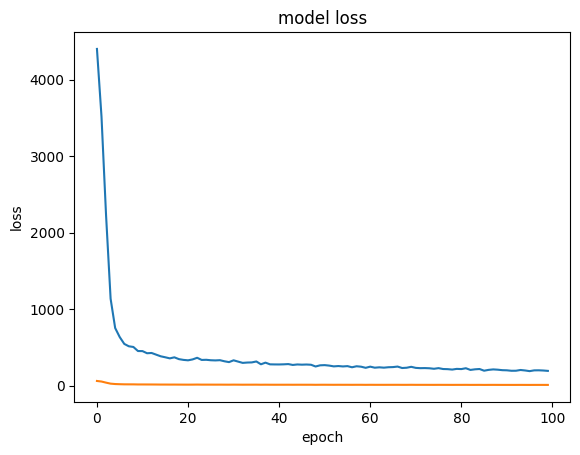

In [ ]:
features = data[['year', 'goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score',
                 'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score', 'goal_10_score',
                 'goal_11_score', 'goal_12_score', 'goal_13_score', 'goal_14_score', 'goal_15_score',
                 'goal_16_score', 'goal_17_score']]
target = data['sdg_index_score']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(18,)))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

print("The model summary is ")
print(model.summary())
print("\n")

model.compile(loss='mse', optimizer='adam',
             metrics=['mse', 'mae'])

history = model.fit(X_train,y_train,batch_size=100,epochs=100,verbose=1)

scores=model.evaluate(X_test, y_test, verbose=1)

print("\n")
print("Loss: ",scores[0])
print("MSE (Mean Squared Error): ", scores[1])
print("MAE(Mean Absolute Error): ",scores[2])
print("\n")

print(history.history.keys())

plt.plot(history.history['mse'])
plt.plot(history.history['mae'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

**Deep Learning for Prediction - rmsprop**

The model summary is 
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               1900      
                                                                 
 dense_11 (Dense)            (None, 200)               20200     
                                                                 
 dropout_6 (Dropout)         (None, 200)               0         
                                                                 
 dense_12 (Dense)            (None, 50)                10050     
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
                                                                 
 dense_13 (Dense)            (None, 100)               5100      
                                                                 
 dropout_8 (Dropout)         (No

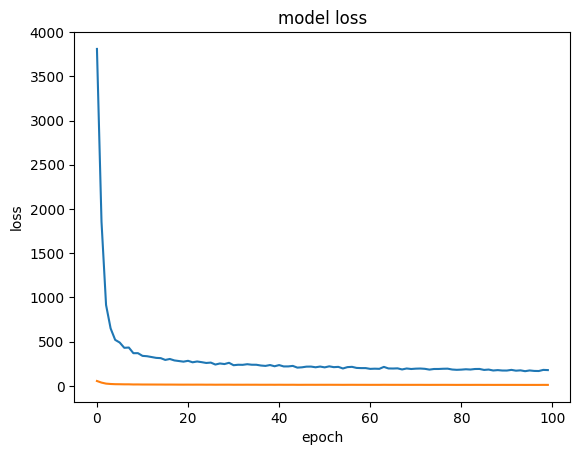

In [ ]:
features = data[['year', 'goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score',
                 'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score', 'goal_10_score',
                 'goal_11_score', 'goal_12_score', 'goal_13_score', 'goal_14_score', 'goal_15_score',
                 'goal_16_score', 'goal_17_score']]
target = data['sdg_index_score']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(18,)))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

print("The model summary is ")
print(model.summary())
print("\n")

model.compile(loss='mse', optimizer='rmsprop',
             metrics=['mse', 'mae'])

history = model.fit(X_train,y_train,batch_size=100,epochs=100,verbose=1)

scores=model.evaluate(X_test, y_test, verbose=1)

print("\n")
print("Loss: ",scores[0])
print("MSE (Mean Squared Error): ", scores[1])
print("MAE(Mean Absolute Error): ",scores[2])
print("\n")

print(history.history.keys())

plt.plot(history.history['mse'])
plt.plot(history.history['mae'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

**Deep Learning for Classification - adam**



Model Summary 
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 18)                342       
                                                                 
 dense_22 (Dense)            (None, 64)                1216      
                                                                 
 dense_23 (Dense)            (None, 3)                 195       
                                                                 
Total params: 1753 (6.85 KB)
Trainable params: 1753 (6.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Epoch 1/100
24/24 [==============================] - 1s 17ms/step - loss: 1.1654 - accuracy: 0.3536 - val_loss: 0.8897 - val_accuracy: 0.6973
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 0.7237 - accuracy: 0.7958 - val_loss: 0.5690 - 

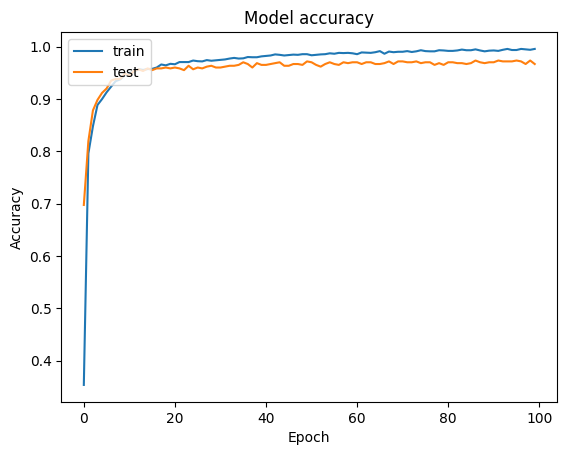

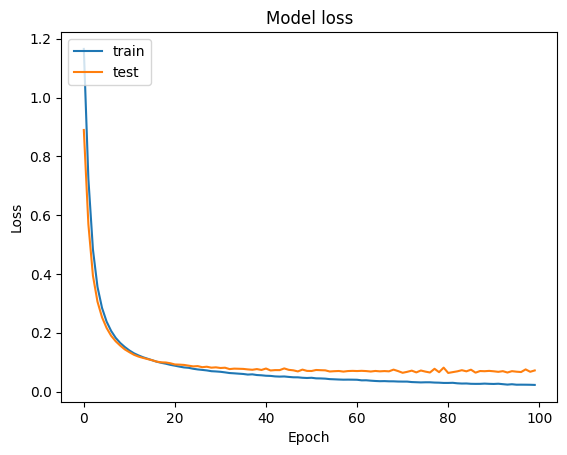

In [ ]:
features = data[['year', 'goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score',
                 'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score', 'goal_10_score',
                 'goal_11_score', 'goal_12_score', 'goal_13_score', 'goal_14_score', 'goal_15_score',
                 'goal_16_score', 'goal_17_score']]
target = data['sdg_index_score']

low_threshold = 60
high_threshold = 70

def classify_sustainability_index(score):
    if score >= high_threshold:
        return 2
    elif score <= low_threshold:
        return 0
    else:
        return 1

target_classes = target.apply(classify_sustainability_index)

X_train, X_test, y_train, y_test = train_test_split(features, target_classes, test_size=0.25, random_state=0)

sc = StandardScaler(with_mean=True, with_std=True)
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

No_classes = 3
y_train = to_categorical(y_train, No_classes)
y_test  = to_categorical(y_test, No_classes)

model = Sequential()
model.add(Dense(18, input_dim=18, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

print("\n")
print("Model Summary ")
print(model.summary())
print("\n")

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_std, y_train, batch_size=100, epochs=100,verbose=1, validation_split=0.20)

#Evaluate the model
score = model.evaluate(X_test_std, y_test, verbose=1)
print("Names of the score metrics in model evaluation are: ")
print(model.metrics_names)

print("\n")
print("Loss (Categorical Cross Entropy): ",score[0])
print("Accuracy (%): ", score[1])
print("\n")

print(history.history.keys())
print("\n")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**Deep Learning for Classification - rmsprop**



Model Summary 
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 18)                342       
                                                                 
 dense_25 (Dense)            (None, 64)                1216      
                                                                 
 dense_26 (Dense)            (None, 3)                 195       
                                                                 
Total params: 1753 (6.85 KB)
Trainable params: 1753 (6.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Epoch 1/100
24/24 [==============================] - 1s 16ms/step - loss: 0.9783 - accuracy: 0.5958 - val_loss: 0.6833 - val_accuracy: 0.8344
Epoch 2/100
24/24 [==============================] - 0s 6ms/step - loss: 0.5643 - accuracy: 0.8498 - val_loss: 0.4286 - 

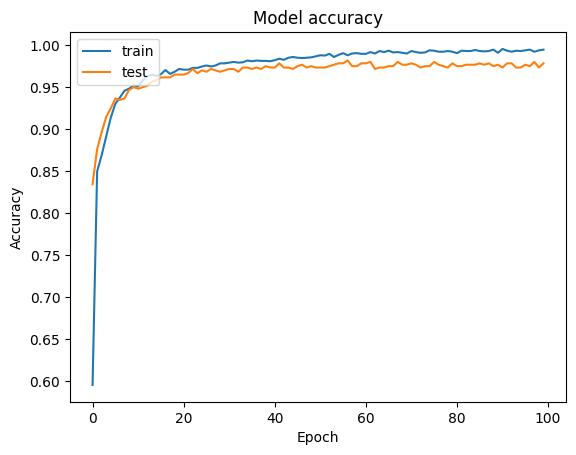

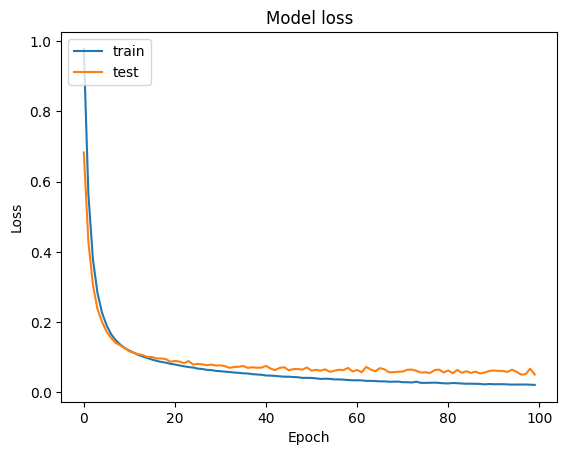

In [ ]:
features = data[['year', 'goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score',
                 'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score', 'goal_10_score',
                 'goal_11_score', 'goal_12_score', 'goal_13_score', 'goal_14_score', 'goal_15_score',
                 'goal_16_score', 'goal_17_score']]
target = data['sdg_index_score']

low_threshold = 60
high_threshold = 70

def classify_sustainability_index(score):
    if score >= high_threshold:
        return 2
    elif score <= low_threshold:
        return 0
    else:
        return 1

target_classes = target.apply(classify_sustainability_index)

X_train, X_test, y_train, y_test = train_test_split(features, target_classes, test_size=0.25, random_state=0)

sc = StandardScaler(with_mean=True, with_std=True)
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

No_classes = 3
y_train = to_categorical(y_train, No_classes)
y_test  = to_categorical(y_test, No_classes)

model = Sequential()
model.add(Dense(18, input_dim=18, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

print("\n")
print("Model Summary ")
print(model.summary())
print("\n")

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(X_train_std, y_train, batch_size=100, epochs=100,verbose=1, validation_split=0.20)

#Evaluate the model
score = model.evaluate(X_test_std, y_test, verbose=1)
print("Names of the score metrics in model evaluation are: ")
print(model.metrics_names)

print("\n")
print("Loss (Categorical Cross Entropy): ",score[0])
print("Accuracy (%): ", score[1])
print("\n")

print(history.history.keys())
print("\n")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()